In [5]:
from Learners import GreedyLearner, GreedyUCBLearner
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)
plt.style.use('seaborn-v0_8')


In [10]:

def run_2_e_experiment(rounds):
    num_tests = 2000
    num_arms = 10

    learners = [(GreedyLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': 5,
                                    'epsilon': 0.0}),
                (GreedyUCBLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': 0,
                                    'c': 2, 'epsilon': 0.1}),
                (GreedyUCBLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': 0,
                                    'c': 2, 'epsilon': 0.01})
                ]

    scores = [np.empty((num_tests, rounds)) for _ in range(len(learners))]
    regret = [np.empty((num_tests, rounds)) for _ in range(len(learners))]

    for i in range(num_tests):

        # Ensure that the testbed is the same for each learner
        means = np.random.normal(size=num_arms)
        testbed = np.random.normal(loc=means, size=(rounds, num_arms))
        testbed_means = np.repeat(means[np.newaxis, :], rounds, axis=0)

        # Run each learner
        for idx, (learner_class, kwargs) in enumerate(learners):
            
            learner = learner_class(testbed=testbed, testbed_means=testbed_means, **kwargs)
            learner.learn()
            scores[idx][i] = learner.rewards
            regret[idx][i] = learner.regret


    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    ax, ax2 = axs

    for idx, learner in enumerate([r'Greedy $Q_{0}=5$', r'UCB $\epsilon$ = 0.1', 'UCB $\epsilon$ = 0.01']):
        ax.plot(np.mean(scores[idx], axis=0), label=learner, alpha=0.7)
        ax2.plot(np.cumsum(regret[idx], axis=1).mean(axis=0), label=learner)

    plt.suptitle(f'Learners - Stationary {num_arms} Bandit Problem')
    ax.set_ylabel('Average Reward')
    ax2.set_ylabel('Average Cumulative Regret')
    ax.set_xlabel('Rounds')
    ax2.set_xlabel('Rounds')
    plt.legend()

    plt.savefig(f'../../plots/q2/e_{rounds}.png', dpi=300)
    plt.show()

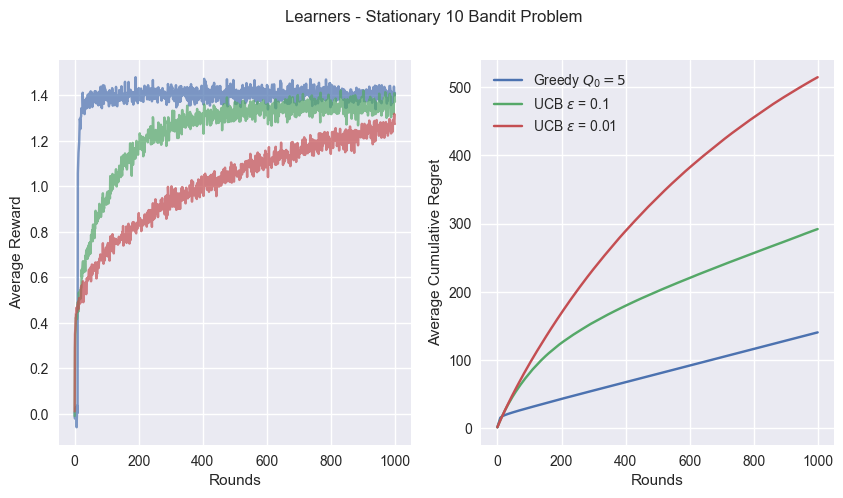

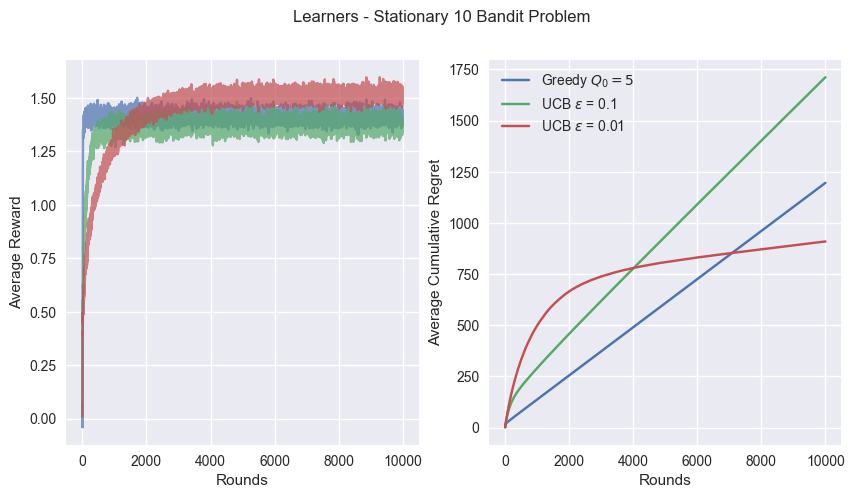

In [11]:
for rounds in [1_000, 10_000]:
    run_2_e_experiment(rounds)
